In [1]:
import numpy as np
import statistics
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()

In [2]:
samples = np.loadtxt('Data.txt',dtype = float)

In [3]:
electrode_1 = samples[:,0]
electrode_2 = samples[:,1]


In [4]:
def positive(data):
    elec = np.absolute(data)
    return elec

In [5]:
def standard_dev(data,no_of_samples, factor):
    return  np.std(data[:no_of_samples]) * factor

In [6]:
def crop(data,threshold):
    cropped = []
    flag = 1
    a = []
    x = 1
    while (x<len(data)):
        if x == 0 :
            x+=1
            continue
        if x == len(data)-1:
            break
        if data[x] > threshold and data[x]>data[x-1] and data[x]>data[x+1]:
            cropped.append(x)
            x+=48
        else:
            x+=1
    return cropped

In [ ]:
threshold = np.std(electrode_1) * 3.5

In [ ]:
absolute = positive(electrode_1)
peaks = []
new_time = crop(absolute,threshold)


In [7]:
def get_spikes(data,new_time):
    spikes = []
    for x in new_time:
        a = data[x-24:x+25]
        spikes.append(a)
    
    return spikes

In [8]:
def get_pca(spikes):
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(spikes)
    principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
    per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
    return principalDf,per_var


In [ ]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
plt.scatter(principalDf.PC1, principalDf.PC2)
plt.title('FeatureSpace_1_3_5')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
 
for sample in principalDf.index:
    plt.plot(principalDf.PC1.loc[sample], principalDf.PC2.loc[sample])
plt.ylim(-0.00025, 0.00025) 
plt.xlim(-0.00025,0.00025)
plt.show()

In [20]:
def use_kmeans(principalDf,no_of_clusters):

    kmeans = KMeans(n_clusters=no_of_clusters)
    kmeans.fit(principalDf)
    y_kmeans = kmeans.predict(principalDf)
    centers = kmeans.cluster_centers_
    
    plt.plot(centers)
    plt.title('templates')
    plt.show()
    
    return y_kmeans,centers



In [ ]:
plt.plot(electrode_1[0:20000])
plt.axhline(y=threshold, color='g', linestyle='-')
plt.axhline(y=-threshold, color='g', linestyle='-')
for x in range(len(y_kmeans)):
    if y_kmeans[x] == 0:
        plt.scatter(new_time[x], 0.0001, s=80, c='blue', marker=(5, 1))
    elif y_kmeans[x] == 1:
        plt.scatter(new_time[x], 0.0001, s=80, c='red', marker=(5, 1))
    elif y_kmeans[x] == 2:
        plt.scatter(new_time[x], 0.0001, s=80, c='yellow', marker=(5, 1))
    else:
        plt.scatter(new_time[x], 0.0001, s=80, c='black', marker=(5, 1))
        
plt.xlim(0,20000)
plt.show()

In [ ]:
centers = kmeans.cluster_centers_
plt.plot(centers[1:5])

In [25]:
def spike_sorting_algorithm(data, threshold_number_of_samples, threshold_factor, k):
    absolute = positive(data)
    threshold = standard_dev(data,threshold_number_of_samples, threshold_factor)
    
    new_time = crop(absolute,threshold)
    
    spikes = get_spikes(data,new_time)
    
    for x in range (len(spikes)):
        plt.plot(spikes[x])
        
    plt.title('spikes')
    plt.show()    
    
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(spikes)
    principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
    per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
    plt.scatter(principalDf.PC1, principalDf.PC2)
    plt.xlabel('PC1 - {0}%'.format(per_var[0]))
    plt.ylabel('PC2 - {0}%'.format(per_var[1]))
    
    for sample in principalDf.index:
        plt.plot(principalDf.PC1.loc[sample], principalDf.PC2.loc[sample])
    plt.ylim(-0.00025, 0.00025) 
    plt.xlim(-0.00025,0.00025)
    plt.title('FeatureSpace')

    plt.show()
    
    
    y_kmeans,centers = use_kmeans(principalDf,k)
    
    plt.scatter(principalDf.PC1, principalDf.PC2, c=y_kmeans, s=50, cmap='viridis')
    plt.title('FeatureSpace_separated')


    
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
    plt.ylim(-0.00025, 0.00025) 
    plt.xlim(-0.00025,0.00025)
    plt.show()
    
    plt.plot(centers)
    plt.title('templates')
    plt.show()
    
    plt.plot(data[0:20000])
    plt.axhline(y=threshold, color='g', linestyle='-')
    plt.axhline(y=-threshold, color='g', linestyle='-')
    for x in range(len(y_kmeans)):
        if y_kmeans[x] == 0:
            plt.scatter(new_time[x], 0.0001, s=80, c='blue', marker=(5, 1))
        elif y_kmeans[x] == 1:
            plt.scatter(new_time[x], 0.0001, s=80, c='red', marker=(5, 1))
        elif y_kmeans[x] == 2:
            plt.scatter(new_time[x], 0.0001, s=80, c='yellow', marker=(5, 1))
        else:
            plt.scatter(new_time[x], 0.0001, s=80, c='black', marker=(5, 1))

    plt.xlim(0,20000)
    plt.title('detected_spikes')

    plt.show()

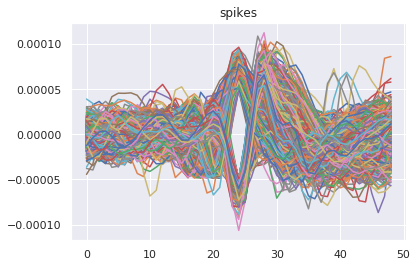

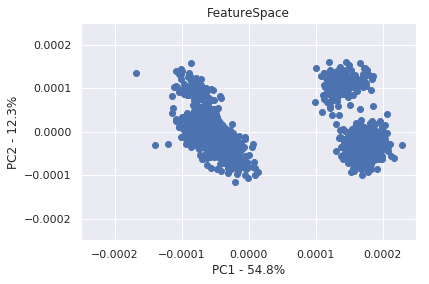

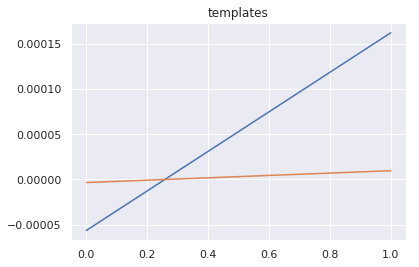

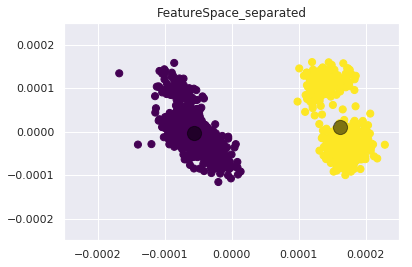

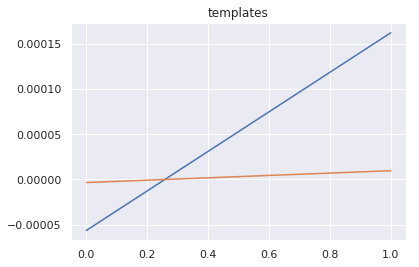

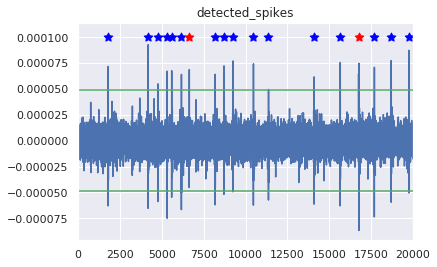

In [34]:
spike_sorting_algorithm(electrode_1,4000000,5,2)

#### 